ref: https://www.kaggle.com/datasets/jeffheaton/iris-computer-vision

mount to google drive

In [1]:
# authentication
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Part1: Image EDA**

In [65]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

img_dir = "/content/drive/My Drive/iris-classification/"
img_subdirs =['iris-setosa/', 'iris-versicolour/', 'iris-virginica/']


df = pd.DataFrame()

for img_subdir in img_subdirs:
   for img_path in sorted(os.listdir(img_dir+img_subdir)):
      row = {'label':img_subdir, 'img_path':img_dir+img_subdir+img_path}
      df = df.append(row,ignore_index=True)
df.info()


<ipython-input-65-86a71cd6b481>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row,ignore_index=True)
<ipython-input-65-86a71cd6b481>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row,ignore_index=True)
<ipython-input-65-86a71cd6b481>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row,ignore_index=True)
<ipython-input-65-86a71cd6b481>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row,ignore_index=True)
<ipython-input-65-86a71cd6b481>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     421 non-null    object
 1   img_path  421 non-null    object
dtypes: object(2)
memory usage: 6.7+ KB
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 201 entries, ('iris-setosa/', 0) to ('iris-virginica/', 66)
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     201 non-null    object
 1   img_path  201 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


<ipython-input-65-86a71cd6b481>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row,ignore_index=True)
<ipython-input-65-86a71cd6b481>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row,ignore_index=True)
<ipython-input-65-86a71cd6b481>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row,ignore_index=True)
<ipython-input-65-86a71cd6b481>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row,ignore_index=True)
<ipython-input-65-86a71cd6b481>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

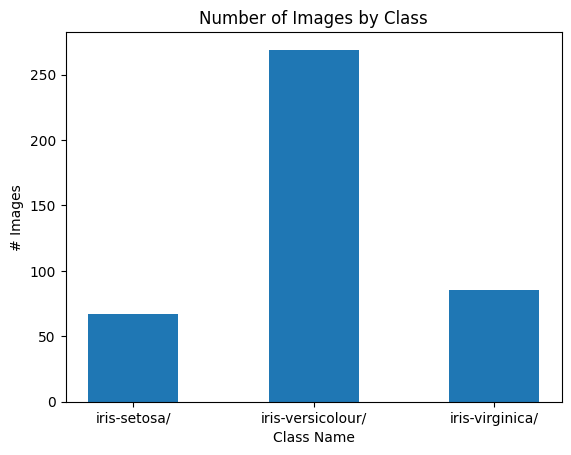

In [66]:
number_classes = {
'iris-setosa/': len(os.listdir(img_dir+'iris-setosa/')),
'iris-versicolour/': len(os.listdir(img_dir+'iris-versicolour/')),
'iris-virginica/': len(os.listdir(img_dir+'iris-virginica/'))
}

plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

We can see that iris-versicolour is the majoritr class, it cause **class imbalanced** problem.

So, we need to balance all classes by following steps.

In [ ]:
g = df.groupby('label')
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
df_paths = g
df_paths.info()

**Then we will preprocess image data by following steps**


- read each image form its path
- covert BGR to RGB, so we can plot it in the next cell.
- resize image to 224 x 224 RGB pixels (we will use this size as Convolutional Layers Input in the next part)
- flatten image to 1d array(look at picture below)
![image.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*CSzLzsw3fC6_cE1VOuTFCA.png)

ref: https://miro.medium.com/v2/resize:fit:1100/format:webp/1*CSzLzsw3fC6_cE1VOuTFCA.png

In [ ]:
y=[]
X=[]
images=[]

for index, row in df_paths.iterrows():
  img = cv2.imread(row['img_path'])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (224,224))

  images.append(img)
  # flatten image
  x = np.array(img).ravel()

  X.append(x)
  y.append(row['label'])

X = np.array(X)/255


images = np.array(images)
print(X.shape)
print(images.shape)

**Sample Images Plot**

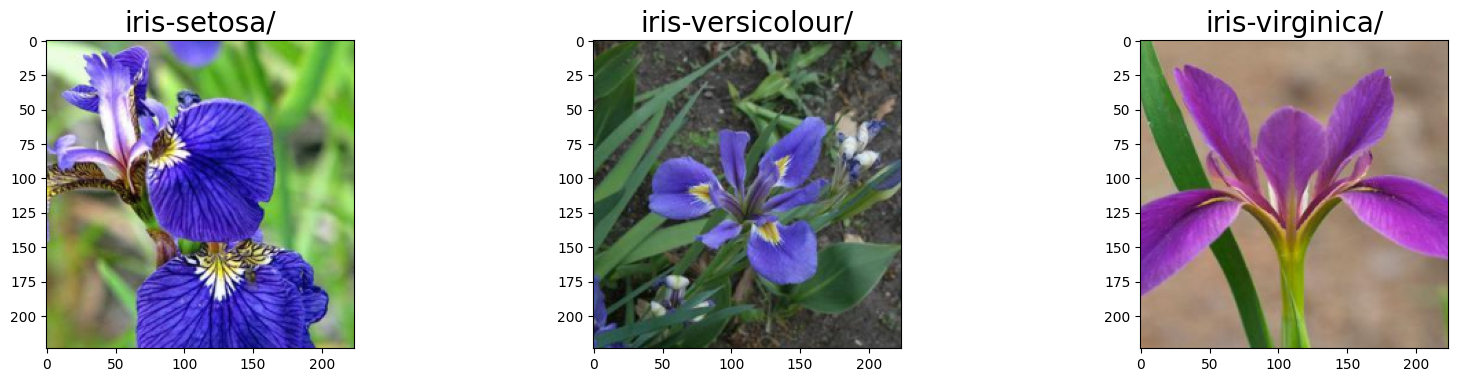

In [6]:
images_show=[images[0],images[70],images[140]]
labels_show=[y[0],y[70],y[140]]
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(images_show, labels_show)):
  plt.subplot(1, 3, index + 1)
  plt.imshow(image)
  plt.title( label, fontsize = 20)

**Part 2: Logistic Regrssion**

Firstly, We try to fit the images directly to logistic regression model.

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logReg = LogisticRegression(solver='lbfgs', max_iter=5000)
logReg.fit(x_train,y_train)

pred = logReg.predict(x_test)
print(confusion_matrix(y_test, pred))
score = logReg.score(x_test, y_test)
print(score)

[[9 7 4]
 [3 4 5]
 [4 9 6]]
0.37254901960784315


The accuracy of logistic regression model isn't a nice score. And from the confusion matrix, the model predicts some species as the other species.

Training etire iris RGB pictures directly to logistic regrssion is not a good idea, many fratures(50,176pixels * 3RGB = **150,528**) with small dataset may cause **overfitting**.



**Convolutional Layers may be a good trick**.

Convolutional Layers may extract only some essential features form the images.
Remaining less features may make them easier to model using logistic regression, avoid overfitting .

So, we try passing the images to Convolutional Layers before send their extracted features to logistic regression model

**Part 3: Logistic Regression plus Convolutional Layers**

In [9]:
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input, decode_predictions
from keras import backend as K
K.clear_session()
# Call resnet50 model
base_model = ResNet50(weights='imagenet', include_top=True)
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

Take convolutional layers form **resnet50** model

then pass the images to the Layers.

In [10]:
import pandas as pd
from keras.models import Model

# call layer inside resnet50 model
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

# pass image to convolutional layers
images_pred =[]
for image in images:
  image = np.expand_dims(image, axis=0)
  predict_model = model.predict(image)
  images_pred += [predict_model[0]]
print (np.shape(images_pred))
df_feature = pd.DataFrame(images_pred )
df_feature.to_csv('/content/drive/My Drive/iris-classification/feature_res50.csv')
df_feature

1/1 [==============================] - 0s 132ms/step
(201, 2048)


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,3.336664,0.089734,0.000000,0.002115,0.304150,0.017423,0.112224,0.164208,0.002289,0.000000,...,1.750253,0.019859,0.000000,1.074283,0.000000,0.000000,0.241385,0.280908,0.234832,0.385158
1,3.793380,0.051940,0.000000,0.008566,0.014494,0.097561,0.020398,0.006089,0.000000,0.016492,...,0.308697,0.000000,0.260015,0.394540,0.069879,0.000000,0.810125,0.178621,0.082623,0.096770
2,2.716362,0.464049,0.000000,0.000000,0.000000,0.076707,0.011312,0.137398,0.000710,0.000000,...,1.443690,0.004338,0.000000,0.000000,0.000000,0.462048,0.000000,0.125311,0.343988,0.206381
3,3.352551,0.159909,0.003270,0.361239,0.390539,0.129949,0.041572,0.000000,0.131408,0.000000,...,1.035404,0.035024,0.011537,0.837253,0.013212,0.095412,0.409047,0.232367,0.410187,0.334453
4,4.938402,0.004568,0.356334,0.263210,0.001207,0.000000,0.000000,0.219061,0.045081,0.012999,...,2.509570,0.000000,0.023717,0.024961,0.047775,0.483404,0.103295,0.283715,0.433923,0.263728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2.780513,0.061341,0.149656,0.011729,0.016484,0.000000,0.132383,0.017755,0.282195,0.631119,...,0.454880,0.085122,0.066585,0.113250,0.000000,0.062173,0.008477,0.417908,0.712685,0.363527
197,3.822375,0.000000,0.178468,0.945147,0.000000,0.023259,0.000000,0.500552,0.177376,0.869881,...,2.310760,0.184520,0.000000,0.034685,0.000000,0.098036,0.305183,0.010749,0.889597,0.246238
198,3.003974,0.052043,0.249364,1.410640,0.019218,0.021881,0.188628,0.108560,0.000000,0.000000,...,2.647056,0.050592,0.000000,0.042249,0.011524,0.484251,0.052088,0.381618,0.458964,0.113158
199,3.012886,0.122545,0.163988,0.258132,0.296255,0.041656,0.789075,0.517449,0.005497,0.004852,...,1.380932,0.055273,0.000000,0.144287,0.000000,0.089776,0.258987,0.051120,0.577440,0.426598


now we have 201 samples with 2048 features

And we will fit these features to logistic regression model

In [59]:

# X is Feature of from Resnet50 model
X = np.array(df_feature)

x_train, x_test, y_train, y_test = train_test_split(df_feature, y, test_size=0.2)

logReg2 = LogisticRegression(C=10, solver='lbfgs', max_iter=5000)
logReg2.fit(x_train,y_train)

pred = logReg2.predict(x_test)
print(confusion_matrix(y_test, pred))
score = logReg2.score(x_test, y_test)
print(score)


[[12  0  1]
 [ 3  6  6]
 [ 1  3  9]]
0.6585365853658537


The cunfusion matrix and the accuracy score look much better than only logistic regression in part2

**Additional experiment**
try to use SVM to classify the same features

In [71]:
from sklearn import svm

svmsvc = svm.SVC(C=10, probability=True)
svmsvc.fit(x_train,y_train)

pred = svmsvc.predict(x_test)
print(confusion_matrix(y_test, pred))
score = svmsvc.score(x_test, y_test)
print(score)


[[13  0  0]
 [ 3  7  5]
 [ 1  2 10]]
0.7317073170731707


The cunfusion matrix and the accuracy score look better than above logistic regression

**Summary**

iris picture dataset may hard to classify or differentiate by a simple model. because all species look nearly the same.

To improve accuracy score and reduce confusion in the confusion matrix, we may need more complex model such as **Full CNN** not just convolutional layers and then simple model such as Logistic Regression and SVM.